# California road accident severity classification based on Traffic and Weather parameters.
### **Sidheswar Patra, M.Sc. Data Science**

### Content
* **1 Introduction**
* **2 Data Loading**
* **3 Exploratory Data Analysis**
* **4 Data Preparation**
* **5 Machine Learning**
* **6 Conclusion**
        

## 1. Introduction

Approximately 1.35 million people die in road crashes each year, on average 3,700 people lose their lives every day on the roads. An additional 20-50 million suffer non-fatal injuries, often resulting in long-term disabilities.

More than 38,000 people die every year in crashes on U.S. roadways. The U.S. traffic fatality rate is 12.4 deaths per 100,000 inhabitants. An additional 4.4 million are injured seriously enough to require medical attention. Road crashes are the leading cause of death in the U.S. for people aged 1-54. The economic and societal impact of road crashes costs U.S. citizens 871 billion dollars. Road crashes cost the U.S. more than  380 million dollars in direct medical costs. The U.S. suffers the most road crash deaths of any high-income country, about 50% higher than similar countries in Western Europe, Canada, Australia, and Japan.
Source of information - https://www.asirt.org/safe-travel/road-safety-facts/

Road safety is a shared responsibility, reducing road hazards includes dedication and responsible decision-making by governments, industry, NGOs, and international agencies. So lets deep dive into data and analyse the road accidents using machine learning. We will analyse various parameters ranging from weather conditions to traffic conditions at the point of the accident to get a broader picture of the parameters affecting the accidents and see how these parameters influence the severity of the accident so that the road regulations can be amended to increase the safety of travelers.

### Research Question:
Does the geographical road condition and traffic affect accident severity? How do the weather, timing, and location affect accident severity? Can we classify the accident severity based on these parameters for Los Angeles County in California state for all types of vehicles through the past data from 2016 till the end of 2019?


### Dataset Information

This dataset contains data on road accidents that occurred in state California. The dataset contains accidents from February 2016 till December 2019, collected from several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. There are about 257000 accident records in this dataset.

### Source of Dataset
-Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).
-https://smoosavi.org/datasets/us_accidents 

### Dataset Format

Below is the description of all the 49 attributes present in the dataset.

###	Attribute and its Description	

* **ID :**	This is a unique identifier of the accident record.	
* **Source :**	Indicates source of the accident report (i.e. the API which reported the accident.).	
* **TMC :** A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.	
* **Severity :**	Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).	
* **Start_Time:**	Shows start time of the accident in local time zone.
* **End_Time:**	Shows end time of the accident in local time zone.
* **Start_Lat:**	Shows latitude in GPS coordinate of the start point.
* **Start_Lng:**	Shows longitude in GPS coordinate of the start point.
* **End_Lat:**	Shows latitude in GPS coordinate of the end point.	
* **End_Lng:**	Shows longitude in GPS coordinate of the end point.	
* **Distance(mi):**	The length of the road extent affected by the accident.	
* **Description:**	Shows natural language description of the accident.	
* **Number:**	Shows the street number in address field.	
* **Street:**	Shows the street name in address field.	
* **Side:**	Shows the relative side of the street (Right/Left) in address field.	
* **City:**	Shows the city in address field.	
* **County:**	Shows the county in address field.	
* **State:**	Shows the state in address field.	
* **Zipcode:**	Shows the zipcode in address field.	
* **Country:**	Shows the country in address field.	
* **Timezone:**	Shows timezone based on the location of the accident (eastern, central, etc.).	
* **Airport_Code:**	Denotes an airport-based weather station which is the closest one to location of the accident.	
* **Weather_Timestamp:**	Shows the time-stamp of weather observation record (in local time).	
* **Temperature(F):**	Shows the temperature (in Fahrenheit).	
* **Wind_Chill(F):**	Shows the wind chill (in Fahrenheit).	
* **Humidity(%):** Shows the humidity (in percentage).	
* **Pressure(in):**	Shows the air pressure (in inches).	
* **Visibility(mi):**	Shows visibility (in miles).	
* **Wind_Direction:**	Shows wind direction.	
* **Wind_Speed(mph):**	Shows wind speed (in miles per hour).	
* **Precipitation(in):**	Shows precipitation amount in inches, if there is any.	
* **Weather_Condition:**	Shows the weather condition (rain, snow, thunderstorm, fog, etc.)	
* **Amenity:**	A POI annotation which indicates presence of amenity in a nearby location.	
* **Bump:**	A POI annotation which indicates presence of speed bump or hump in a nearby location.	
* **Crossing:**	A POI annotation which indicates presence of crossing in a nearby location.	
* **Give_Way:**	A POI annotation which indicates presence of give_way in a nearby location.	
* **Junction:**	A POI annotation which indicates presence of junction in a nearby location.	
* **No_Exit:**	A POI annotation which indicates presence of no_exit in a nearby location.	
* **Railway:**	A POI annotation which indicates presence of railway in a nearby location.	
* **Roundabout:**	A POI annotation which indicates presence of roundabout in a nearby location.	
* **Station:**	A POI annotation which indicates presence of station in a nearby location.	
* **Stop:**	A POI annotation which indicates presence of stop in a nearby location.	
* **Traffic_Calming:**	A POI annotation which indicates presence of traffic_calming in a nearby location.
* **Traffic_Signal:**	A POI annotation which indicates presence of traffic_signal in a nearby location.
* **Turning_Loop:**	A POI annotation which indicates presence of turning_loop in a nearby location.
* **Sunrise_Sunset:**	Shows the period of day (i.e. day or night) based on sunrise/sunset.	
* **Civil_Twilight:**	Shows the period of day (i.e. day or night) based on civil twilight.	
* **Nautical_Twilight:**	Shows the period of day (i.e. day or night) based on nautical twilight.
* **Astronomical_Twilight:**	Shows the period of day (i.e. day or night) based on astronomical twilight.


## 2. Data Loading

### Importing the libraries required for Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
import datetime

### Reading the dataset file into a pandas dataframe df.

In [2]:
df = pd.read_csv("US_Accidents_CA.csv")

### Checking the columns of the data.

In [3]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Viewing the top 5 rows of the data.

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-729,MapQuest,201,3,21-06-2016 10:34,21-06-2016 11:04,38.085300,-122.233017,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,Magazine St,R,Vallejo,Solano,CA,94591,US,US/Pacific,KAPC,21-06-2016 10:54,75.0,NaN,48.0,30.00,10.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-730,MapQuest,201,3,21-06-2016 10:30,21-06-2016 11:16,37.631813,-122.084167,NaN,NaN,0.0,Accident on I-880 Northbound at Exit 26 Tennys...,NaN,I-880 N,R,Hayward,Alameda,CA,94544,US,US/Pacific,KHWD,21-06-2016 10:54,75.0,NaN,48.0,30.06,10.0,WSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-731,MapQuest,201,2,21-06-2016 10:49,21-06-2016 11:19,37.896564,-122.070717,NaN,NaN,0.0,Right lane blocked due to accident on CA-24 We...,NaN,I-680 N,R,Walnut Creek,Contra Costa,CA,94595,US,US/Pacific,KCCR,21-06-2016 10:53,82.9,NaN,31.0,29.97,10.0,NNW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-732,MapQuest,201,3,21-06-2016 10:41,21-06-2016 11:11,37.334255,-122.032471,NaN,NaN,0.0,#4 &amp; HOV lane blocked due to accident on I...,NaN,N De Anza Blvd,R,Cupertino,Santa Clara,CA,95014,US,US/Pacific,KNUQ,21-06-2016 10:56,75.9,NaN,48.0,30.04,10.0,NNE,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-733,MapQuest,201,2,21-06-2016 10:16,21-06-2016 11:04,37.250729,-121.910713,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,NaN,Norman Y Mineta Hwy,R,San Jose,Santa Clara,CA,95118,US,US/Pacific,KRHV,21-06-2016 09:50,75.2,NaN,41.0,30.06,10.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


### Checking the metadata information of data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254987 entries, 0 to 254986
Data columns (total 49 columns):
ID                       254987 non-null object
Source                   254987 non-null object
TMC                      254987 non-null int64
Severity                 254987 non-null int64
Start_Time               254987 non-null object
End_Time                 254987 non-null object
Start_Lat                254987 non-null float64
Start_Lng                254987 non-null float64
End_Lat                  0 non-null float64
End_Lng                  0 non-null float64
Distance(mi)             254987 non-null float64
Description              254987 non-null object
Number                   59546 non-null float64
Street                   254987 non-null object
Side                     254987 non-null object
City                     254985 non-null object
County                   254987 non-null object
State                    254987 non-null object
Zipcode                  254941 

### Checking the number of null values present in each of the columns sorting it in descending order.

In [6]:
df.isnull().sum().sort_values(ascending=False)

End_Lat                  254987
End_Lng                  254987
Number                   195441
Wind_Chill(F)            174422
Precipitation(in)        172819
Wind_Speed(mph)           43974
Humidity(%)                5762
Temperature(F)             5227
Visibility(mi)             5153
Weather_Condition          4658
Wind_Direction             4419
Pressure(in)               4083
Weather_Timestamp          3280
Airport_Code                 51
Timezone                     46
Zipcode                      46
Nautical_Twilight             2
City                          2
Astronomical_Twilight         2
Civil_Twilight                2
Sunrise_Sunset                2
Amenity                       0
Bump                          0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Descript

We have accident location details in Start_Lat, Start_Lng, so dont need End_Lat and End_Lng.
Number, Wind_Chill(F), Precipitation(in), Wind_Speed(mph) are also not important fields and can hamper analysis,  so removing these fields.

### Dropping the top 6 columns having null values.

In [7]:
df = df.drop(['End_Lat','End_Lng','Number','Wind_Chill(F)','Precipitation(in)','Wind_Speed(mph)'],axis=1)

### Checking the null values again.

In [8]:
df.isnull().sum().sort_values(ascending=False)

Humidity(%)              5762
Temperature(F)           5227
Visibility(mi)           5153
Weather_Condition        4658
Wind_Direction           4419
Pressure(in)             4083
Weather_Timestamp        3280
Airport_Code               51
Zipcode                    46
Timezone                   46
City                        2
Nautical_Twilight           2
Astronomical_Twilight       2
Civil_Twilight              2
Sunrise_Sunset              2
Give_Way                    0
County                      0
Source                      0
TMC                         0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
Distance(mi)                0
Description                 0
Street                      0
Side                        0
State                       0
Crossing                    0
Country                     0
Turning_Loop                0
Traffic_Signal              0
Traffic_Ca

We will take action on these null values after checking their influence through EDA.

## 3- Exploratory Data Analysis

### Checking the County-wise accident frequency in California.

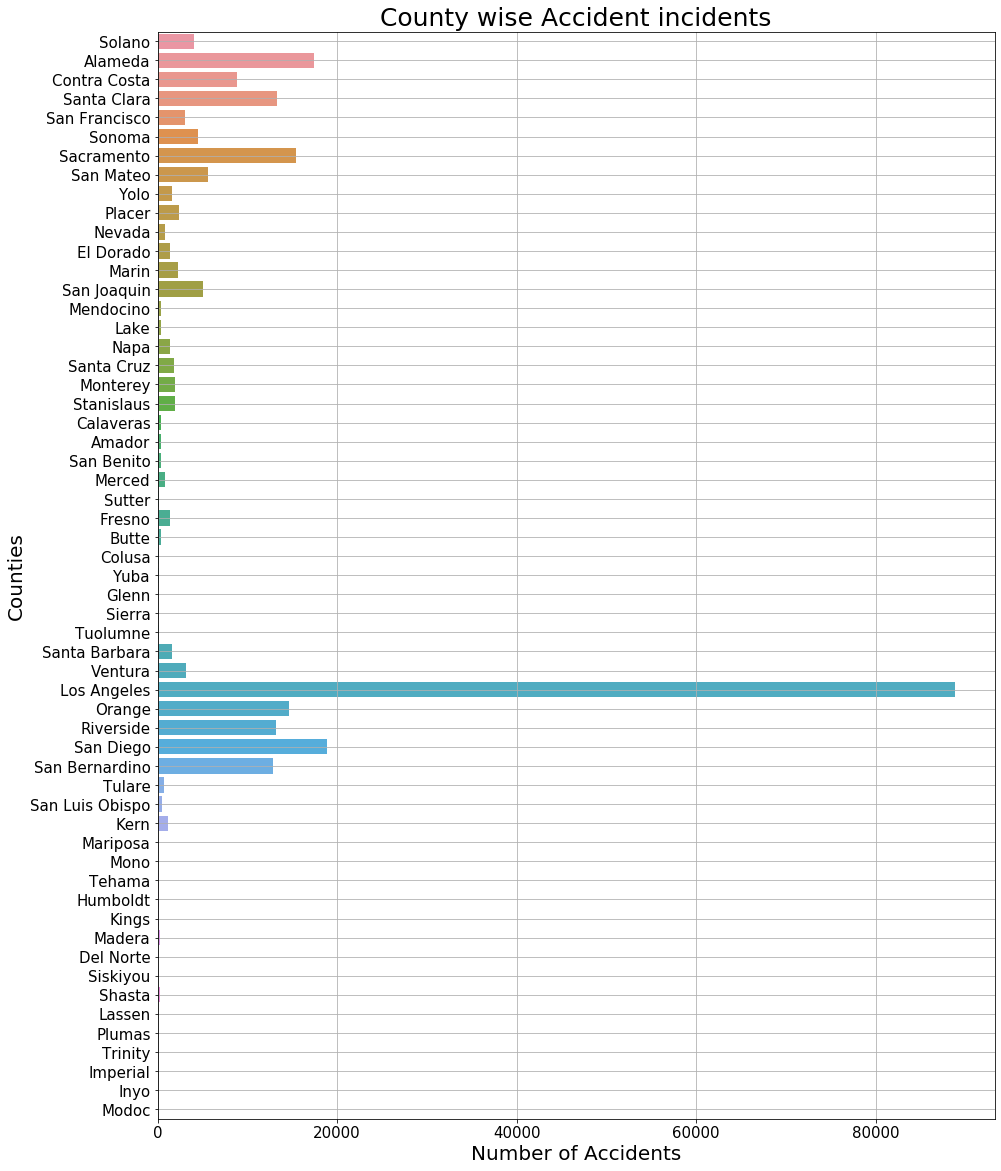

In [11]:
figure = plt.subplots(figsize=(15,20))
sns.countplot(y = "County", data=df)
plt.title('County wise Accident incidents',fontsize=25)
plt.xlabel('Number of Accidents',fontsize=20)
plt.ylabel('Counties',fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()


We can see only few counties have most number of accidents in California. Let's see the counties having maximum accidents.

### Checking the top 5 counties having accidents sorted in descending order.

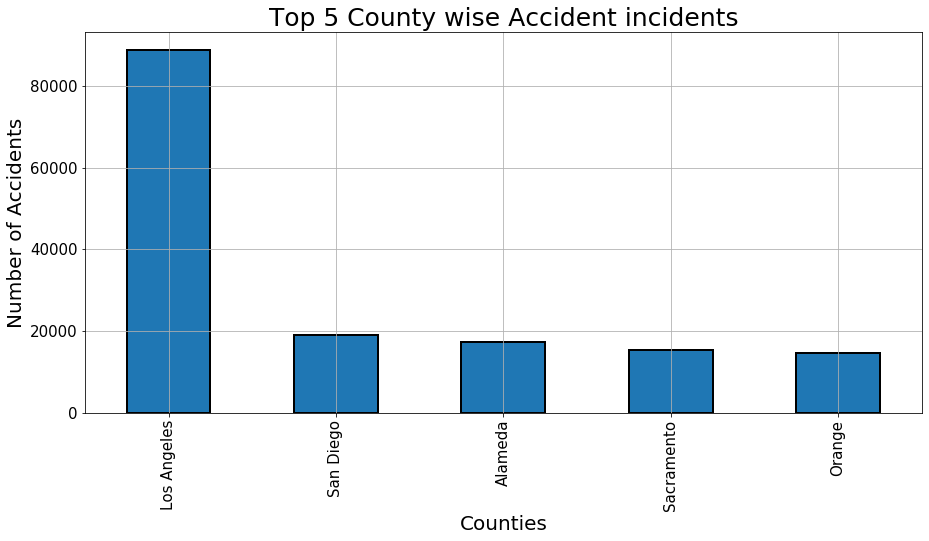

In [12]:
figure = plt.subplots(figsize=(15,7))
df['County'].value_counts(ascending=False).head(5).plot.bar(edgecolor='k',linewidth=2)
plt.title('Top 5 County wise Accident incidents',fontsize=25)
plt.xlabel('Counties',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()


These are the counties having maximum number of accidents. Los Angeles has the highest accident incidents.

### Checking the overall accident locations latitude and longitude in California state.

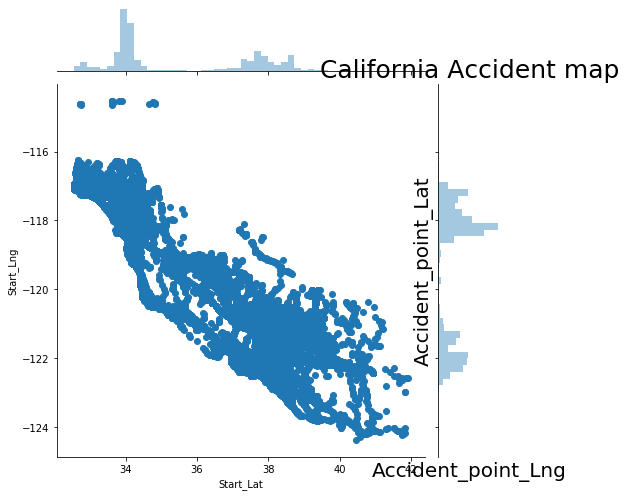

In [13]:
sns.jointplot(x='Start_Lat',y='Start_Lng',data=df,height=7)
plt.title('California Accident map',fontsize=25)
plt.ylabel('Accident_point_Lat', fontsize=20)
plt.xlabel('Accident_point_Lng', fontsize=20)
plt.show()

We can see the accident locations are wide spread across entire California state.

### Checking the influence of weather on accidents.

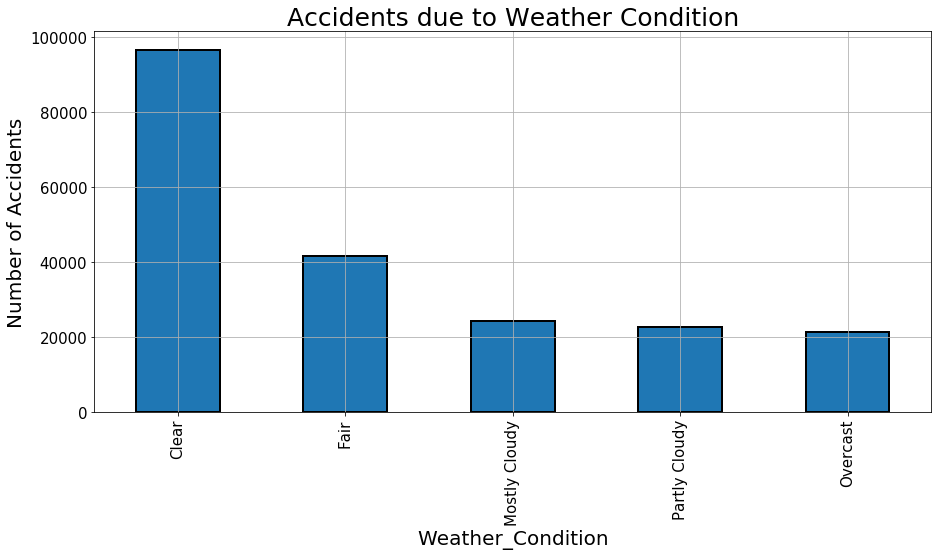

In [14]:
figure=plt.subplots(figsize=(15,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(edgecolor='k',linewidth=2)
plt.title('Accidents due to Weather Condition',fontsize=25)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()

Most of the accidents have occurred in clear weather, we need to dig more to get what parameters of weather mostly influence the accidents.

### Checking the accident severity of all the accidents.

In [15]:
df.groupby('Severity').size()

Severity
1       180
2    145844
3    108721
4       242
dtype: int64

These are accident severity where 1 indicates the least impact on traffic (i.e., short delay)  and 4  indicates a significant impact on traffic (i.e., long delay). Let's see what features influence the accident severity as there are a significant number of accident incidents with higher severity. If we can classify the features affecting accident severity, then the government and road safety regulatory institutions can take appropriate measures to decrease such incidents.

### Plotting the accident severity count sorted in descending order.

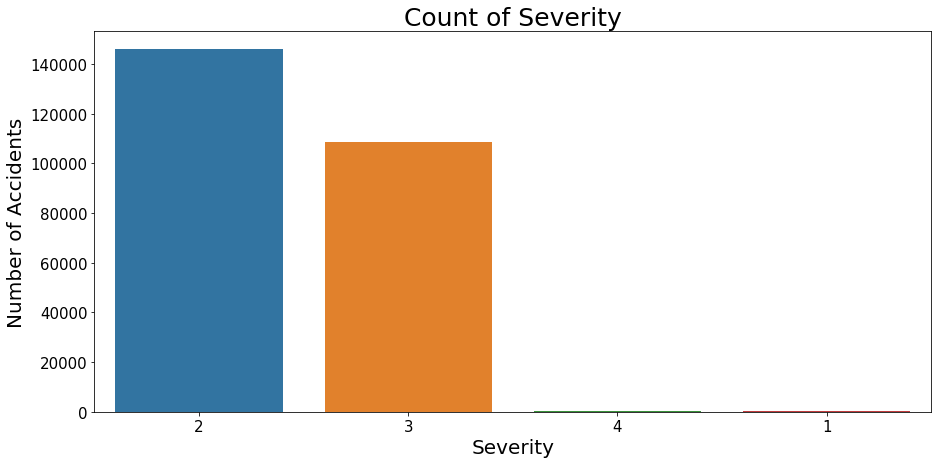

In [16]:
figure = plt.subplots(figsize=(15,7))
sns.countplot('Severity',data=df,order=df['Severity'].value_counts().index)
plt.title('Count of Severity', fontsize=25)
plt.xlabel('Severity',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.tick_params(labelsize=15)


We can see majority of accidents have caused significant impact in the traffic.

### Checking the top 30 Road block duration of accidents sorted in descending order.

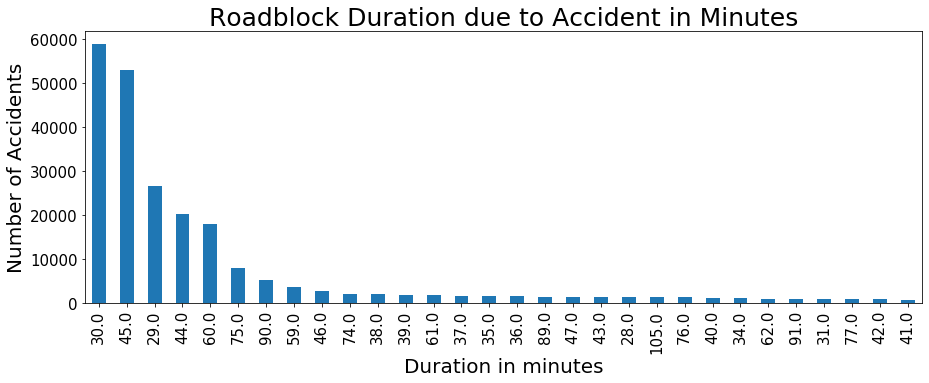

In [17]:
Start = pd.to_datetime(df.Start_Time, format='%d-%m-%Y %H:%M')
End = pd.to_datetime(df.End_Time, format='%d-%m-%Y %H:%M')
Roadblock_Time_Duration = (End-Start)
Acc_Duration_Count = Roadblock_Time_Duration.astype('timedelta64[m]').value_counts().nlargest(30)
Acc_Duration_Count.plot.bar(figsize=(15,5))
plt.title('Roadblock Duration due to Accident in Minutes',fontsize=25)
plt.xlabel('Duration in minutes',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20);
plt.tick_params(labelsize=15)

The majority of accidents have shut the traffic from 30 mins to 1.5 hours which is a considerably long duration. This would harass the commuters traveling for their work and affect the economy of the country. Let's analyse what factors affect accident severity and cause such traffic delays.

### Checking the top 5 rows of data again.

In [18]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-729,MapQuest,201,3,21-06-2016 10:34,21-06-2016 11:04,38.085300,-122.233017,0.0,Right hand shoulder blocked due to accident on...,Magazine St,R,Vallejo,Solano,CA,94591,US,US/Pacific,KAPC,21-06-2016 10:54,75.0,48.0,30.00,10.0,Variable,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-730,MapQuest,201,3,21-06-2016 10:30,21-06-2016 11:16,37.631813,-122.084167,0.0,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,R,Hayward,Alameda,CA,94544,US,US/Pacific,KHWD,21-06-2016 10:54,75.0,48.0,30.06,10.0,WSW,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-731,MapQuest,201,2,21-06-2016 10:49,21-06-2016 11:19,37.896564,-122.070717,0.0,Right lane blocked due to accident on CA-24 We...,I-680 N,R,Walnut Creek,Contra Costa,CA,94595,US,US/Pacific,KCCR,21-06-2016 10:53,82.9,31.0,29.97,10.0,NNW,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-732,MapQuest,201,3,21-06-2016 10:41,21-06-2016 11:11,37.334255,-122.032471,0.0,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,R,Cupertino,Santa Clara,CA,95014,US,US/Pacific,KNUQ,21-06-2016 10:56,75.9,48.0,30.04,10.0,NNE,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-733,MapQuest,201,2,21-06-2016 10:16,21-06-2016 11:04,37.250729,-121.910713,0.0,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,R,San Jose,Santa Clara,CA,95118,US,US/Pacific,KRHV,21-06-2016 09:50,75.2,41.0,30.06,10.0,Variable,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


## 4- Data Preparation:

### Checking metadata of columns.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254987 entries, 0 to 254986
Data columns (total 43 columns):
ID                       254987 non-null object
Source                   254987 non-null object
TMC                      254987 non-null int64
Severity                 254987 non-null int64
Start_Time               254987 non-null object
End_Time                 254987 non-null object
Start_Lat                254987 non-null float64
Start_Lng                254987 non-null float64
Distance(mi)             254987 non-null float64
Description              254987 non-null object
Street                   254987 non-null object
Side                     254987 non-null object
City                     254985 non-null object
County                   254987 non-null object
State                    254987 non-null object
Zipcode                  254941 non-null object
Country                  254987 non-null object
Timezone                 254941 non-null object
Airport_Code            

We need to convert the time columns to datetime format for more data analysis.

### Converting Start_Time and End_Time to datatime datetype.

In [20]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

### Extracting  Day, Month, Year, Hour and Weekday from the data. 

In [21]:
df['Day']=df['Start_Time'].dt.day
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Year']=df['Start_Time'].dt.year
df['Weekday']=df['Start_Time'].dt.strftime('%a')
df['Hour']=df['Start_Time'].dt.hour

### Calculating the Roadblock duration in the unit of minutes for each accident rounded to an integer.

In [22]:
RD='Roadblock_Duration'
df[RD]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

### Checking if there is any negative Roadblock_Duration values

In [23]:
df[RD][df[RD]<=0]

1123     -253395.0
2145     -213030.0
4388     -466500.0
10223    -465091.0
10224    -465090.0
13571    -424771.0
13572    -424770.0
18966    -126675.0
18968    -126675.0
21919    -381570.0
23459     -84931.0
23460     -84930.0
26382    -169845.0
28811    -339810.0
28812    -339810.0
28813    -339810.0
28814    -339795.0
28815    -339795.0
31731    -126675.0
33653    -339810.0
33655    -339810.0
37764    -298020.0
37765    -298035.0
37766    -298050.0
39960    -211650.0
39961    -211650.0
41397    -254850.0
45095    -253395.0
45096    -253395.0
45097    -253395.0
45098    -253395.0
45099    -253395.0
45100    -253395.0
45101    -253395.0
45102    -253395.0
45103    -253395.0
45104    -253395.0
45105    -253395.0
47667    -213090.0
47668    -213090.0
47669    -213090.0
47670    -213090.0
47671    -213090.0
47672    -213070.0
52471    -466516.0
52472    -466516.0
52473    -466515.0
52474    -466516.0
52475    -466515.0
52476    -466515.0
61693    -465075.0
61694    -465075.0
61695    -46

We cannot have a time duration in negative, so these values maybe false and will mislead the analysis, so let's remove those rows.

### Dropping the rows with Roadblock duration in negative.

In [24]:
Negative_Outliers=df[RD]<=0
df[Negative_Outliers] = np.nan
df.dropna(subset=[RD],axis=0,inplace=True)

In [25]:
df[RD][df[RD]<=0]

Series([], Name: Roadblock_Duration, dtype: float64)

### Checking the highest Roadblock_duration.

In [26]:
df[RD].max()

44724.0

This is very long duration, lets convert it into hours format.

### Printing it in hours and days format.

In [27]:
print('Max time to clear an accident: {} minutes or {} hours or {} days;'.format(df[RD].max(),round(df[RD].max()/60), round(df[RD].max()/60/24)))

Max time to clear an accident: 44724.0 minutes or 745.0 hours or 31.0 days;


This is very less likely that there would be a traffic delay for 31 days due to the accident. So this can be a false information and basically is a outlier.

### Checking outliers for Roadblock_Duration, considering standard_deviation(n=3) which contains 99.7% of the values in normal distrubution.

In [28]:
n=3
# Checking median and Standard deviation of Roadblock duration.
Median = df[RD].median()
Std = df[RD].std()
print(Median)
print(Std)
# Putting all the values into outliers which are beyond 3 sd.
Outliers = df[RD] > Std*n

45.0
3495.7859571574163


In [29]:
df[Outliers].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 1217 to 254847
Data columns (total 49 columns):
ID                       1747 non-null object
Source                   1747 non-null object
TMC                      1747 non-null float64
Severity                 1747 non-null float64
Start_Time               1747 non-null datetime64[ns]
End_Time                 1747 non-null datetime64[ns]
Start_Lat                1747 non-null float64
Start_Lng                1747 non-null float64
Distance(mi)             1747 non-null float64
Description              1747 non-null object
Street                   1747 non-null object
Side                     1747 non-null object
City                     1747 non-null object
County                   1747 non-null object
State                    1747 non-null object
Zipcode                  1747 non-null object
Country                  1747 non-null object
Timezone                 1747 non-null object
Airport_Code             1746 non-null 

We can see there are 1747 records with such outlier values. Let's fill them with the median value for better analysis.

### Filling the outliers with Median value.

In [30]:
df[Outliers] = np.nan
df[RD].fillna(Median, inplace=True)

In [31]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day,Month,Year,Weekday,Hour,Roadblock_Duration
0,A-729,MapQuest,201.0,3.0,2016-06-21 10:34:00,2016-06-21 11:04:00,38.085300,-122.233017,0.0,Right hand shoulder blocked due to accident on...,Magazine St,R,Vallejo,Solano,CA,94591,US,US/Pacific,KAPC,21-06-2016 10:54,75.0,48.0,30.00,10.0,Variable,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,21.0,Jun,2016.0,Tue,10.0,30.0
1,A-730,MapQuest,201.0,3.0,2016-06-21 10:30:00,2016-06-21 11:16:00,37.631813,-122.084167,0.0,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,R,Hayward,Alameda,CA,94544,US,US/Pacific,KHWD,21-06-2016 10:54,75.0,48.0,30.06,10.0,WSW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,21.0,Jun,2016.0,Tue,10.0,46.0
2,A-731,MapQuest,201.0,2.0,2016-06-21 10:49:00,2016-06-21 11:19:00,37.896564,-122.070717,0.0,Right lane blocked due to accident on CA-24 We...,I-680 N,R,Walnut Creek,Contra Costa,CA,94595,US,US/Pacific,KCCR,21-06-2016 10:53,82.9,31.0,29.97,10.0,NNW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,21.0,Jun,2016.0,Tue,10.0,30.0
3,A-732,MapQuest,201.0,3.0,2016-06-21 10:41:00,2016-06-21 11:11:00,37.334255,-122.032471,0.0,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,R,Cupertino,Santa Clara,CA,95014,US,US/Pacific,KNUQ,21-06-2016 10:56,75.9,48.0,30.04,10.0,NNE,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,21.0,Jun,2016.0,Tue,10.0,30.0
4,A-733,MapQuest,201.0,2.0,2016-06-21 10:16:00,2016-06-21 11:04:00,37.250729,-121.910713,0.0,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,R,San Jose,Santa Clara,CA,95118,US,US/Pacific,KRHV,21-06-2016 09:50,75.2,41.0,30.06,10.0,Variable,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,21.0,Jun,2016.0,Tue,10.0,48.0


Since we have more time related information, let's dig deep and analyse more.

### Checking the month-wise accident incidents sorted in descending order.

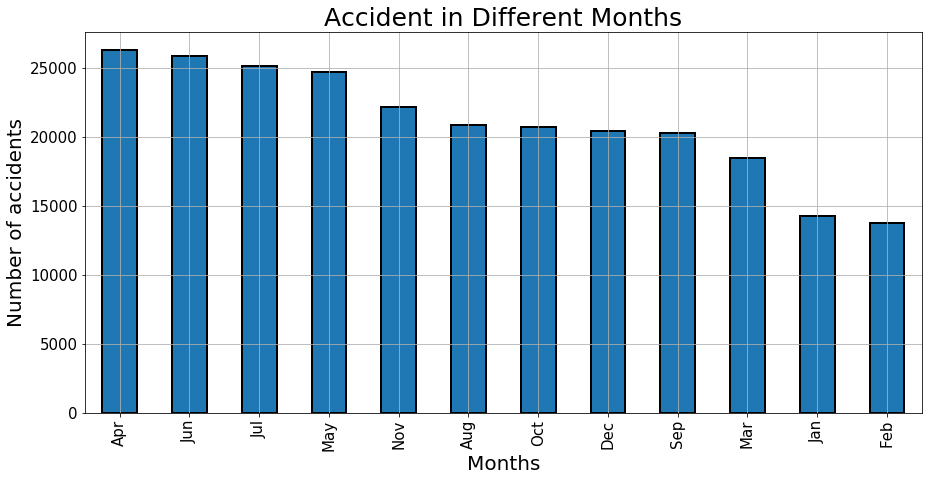

In [36]:
figure = plt.subplots(figsize=(15,7))
df['Month'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.title('Accident in Different Months',fontsize=25)
plt.xlabel('Months',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()

Summer months are more prone to accidents than winter however all the months have a lot of accidents. Let's see in more granular level. 

### Checking the day-wise accident incidents sorted in descending order.

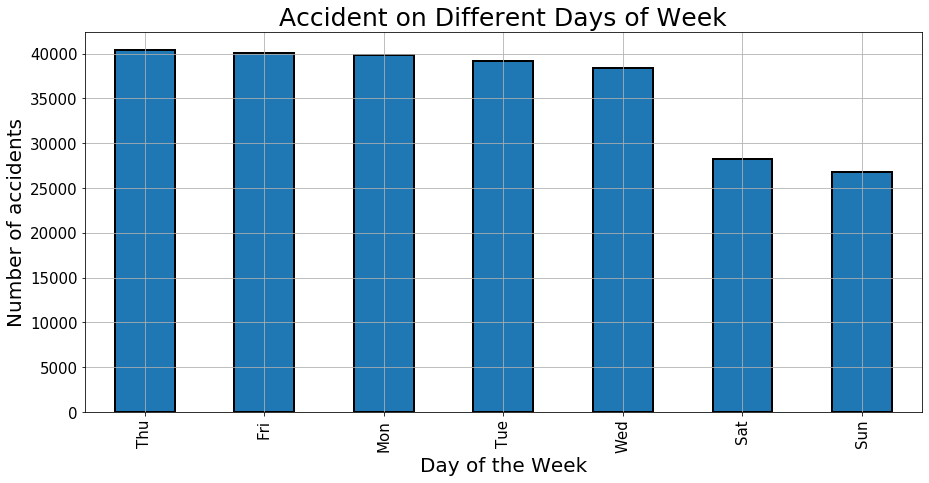

In [33]:
figure = plt.subplots(figsize=(15,7))
df['Weekday'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.title('Accident on Different Days of Week',fontsize=25)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()

Weekdays have most number of accidents than weekends. Let's see what timings are most vulnerable.

### Checking the accident frequencies in hourwise.

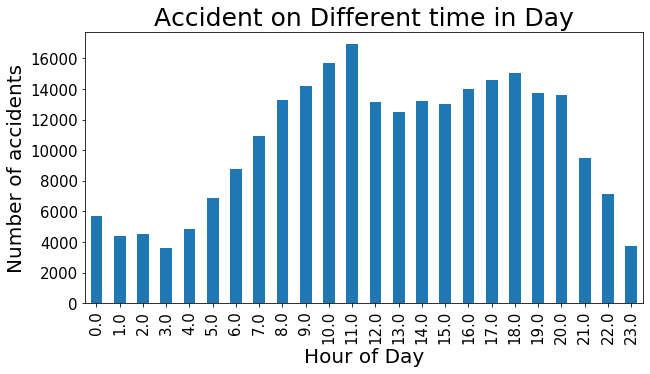

In [37]:
figure = plt.subplots(figsize=(10,5))
df.groupby(['Hour']).size().plot.bar()
plt.title('Accident on Different time in Day',fontsize=25)
plt.xlabel('Hour of Day',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.tick_params(labelsize=15)

Office hours(9-11) and (17-19) are most vulnerable time. Let's categorize the hours from Morning to Night and check the accident counts.

### Categorizing the accidents into different times from Morning to Night.

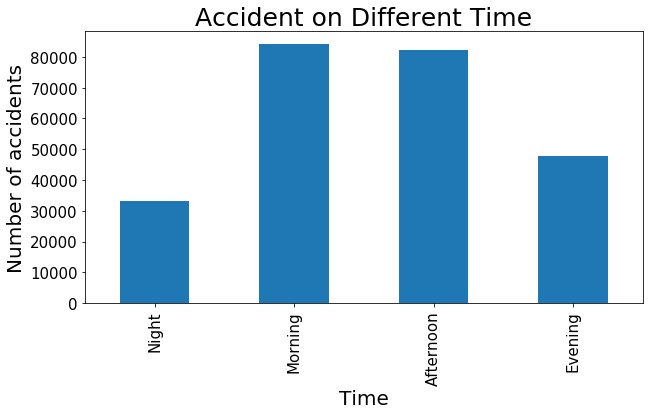

In [38]:
df['Day'] = pd.cut((df['Hour']),bins=(0,6,12,18,24), labels=["Night", "Morning", "Afternoon", "Evening"])
plt.figure(figsize =(10,5))
df.groupby(['Day']).size().plot.bar()
plt.title('Accident on Different Time',fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.tick_params(labelsize=15);

In [39]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day,Month,Year,Weekday,Hour,Roadblock_Duration
0,A-729,MapQuest,201.0,3.0,2016-06-21 10:34:00,2016-06-21 11:04:00,38.085300,-122.233017,0.0,Right hand shoulder blocked due to accident on...,Magazine St,R,Vallejo,Solano,CA,94591,US,US/Pacific,KAPC,21-06-2016 10:54,75.0,48.0,30.00,10.0,Variable,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,Morning,Jun,2016.0,Tue,10.0,30.0
1,A-730,MapQuest,201.0,3.0,2016-06-21 10:30:00,2016-06-21 11:16:00,37.631813,-122.084167,0.0,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,R,Hayward,Alameda,CA,94544,US,US/Pacific,KHWD,21-06-2016 10:54,75.0,48.0,30.06,10.0,WSW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,Morning,Jun,2016.0,Tue,10.0,46.0
2,A-731,MapQuest,201.0,2.0,2016-06-21 10:49:00,2016-06-21 11:19:00,37.896564,-122.070717,0.0,Right lane blocked due to accident on CA-24 We...,I-680 N,R,Walnut Creek,Contra Costa,CA,94595,US,US/Pacific,KCCR,21-06-2016 10:53,82.9,31.0,29.97,10.0,NNW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,Morning,Jun,2016.0,Tue,10.0,30.0
3,A-732,MapQuest,201.0,3.0,2016-06-21 10:41:00,2016-06-21 11:11:00,37.334255,-122.032471,0.0,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,R,Cupertino,Santa Clara,CA,95014,US,US/Pacific,KNUQ,21-06-2016 10:56,75.9,48.0,30.04,10.0,NNE,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,Morning,Jun,2016.0,Tue,10.0,30.0
4,A-733,MapQuest,201.0,2.0,2016-06-21 10:16:00,2016-06-21 11:04:00,37.250729,-121.910713,0.0,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,R,San Jose,Santa Clara,CA,95118,US,US/Pacific,KRHV,21-06-2016 09:50,75.2,41.0,30.06,10.0,Variable,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Day,Day,Day,Morning,Jun,2016.0,Tue,10.0,48.0


We have 49 columns and many of them are not useful. So let's make a feature list with the columns required to carry out further analysis using machine learning.

### Considering the following columns as features for doing machine learning.

In [40]:
feature_list=['Severity','Start_Lng','Start_Lat','Distance(mi)','City','County','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Sunrise_Sunset','Day','Hour','Weekday','Roadblock_Duration']

### Selecting data of columns included in feature_list

In [41]:
df_feature=df[feature_list].copy()
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254689 entries, 0 to 254986
Data columns (total 29 columns):
Severity              252942 non-null float64
Start_Lng             252942 non-null float64
Start_Lat             252942 non-null float64
Distance(mi)          252942 non-null float64
City                  252940 non-null object
County                252942 non-null object
Temperature(F)        247765 non-null float64
Humidity(%)           247236 non-null float64
Pressure(in)          248895 non-null float64
Visibility(mi)        247827 non-null float64
Wind_Direction        248559 non-null object
Weather_Condition     248325 non-null object
Amenity               252942 non-null float64
Bump                  252942 non-null float64
Crossing              252942 non-null float64
Give_Way              252942 non-null float64
Junction              252942 non-null float64
No_Exit               252942 non-null float64
Railway               252942 non-null float64
Roundabout         

df_feature contains 254689 rows of data needed for futher analysis through machine learning.

### Checking the top 5 rows.

In [42]:
df_feature.head()

,Severity,Start_Lng,Start_Lat,Distance(mi),City,County,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Day,Hour,Weekday,Roadblock_Duration
0,3.0,-122.233017,38.085300,0.0,Vallejo,Solano,75.0,48.0,30.00,10.0,Variable,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,30.0
1,3.0,-122.084167,37.631813,0.0,Hayward,Alameda,75.0,48.0,30.06,10.0,WSW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,46.0
2,2.0,-122.070717,37.896564,0.0,Walnut Creek,Contra Costa,82.9,31.0,29.97,10.0,NNW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,30.0
3,3.0,-122.032471,37.334255,0.0,Cupertino,Santa Clara,75.9,48.0,30.04,10.0,NNE,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,30.0
4,2.0,-121.910713,37.250729,0.0,San Jose,Santa Clara,75.2,41.0,30.06,10.0,Variable,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,48.0


### Checking Multicolinearity among the features.

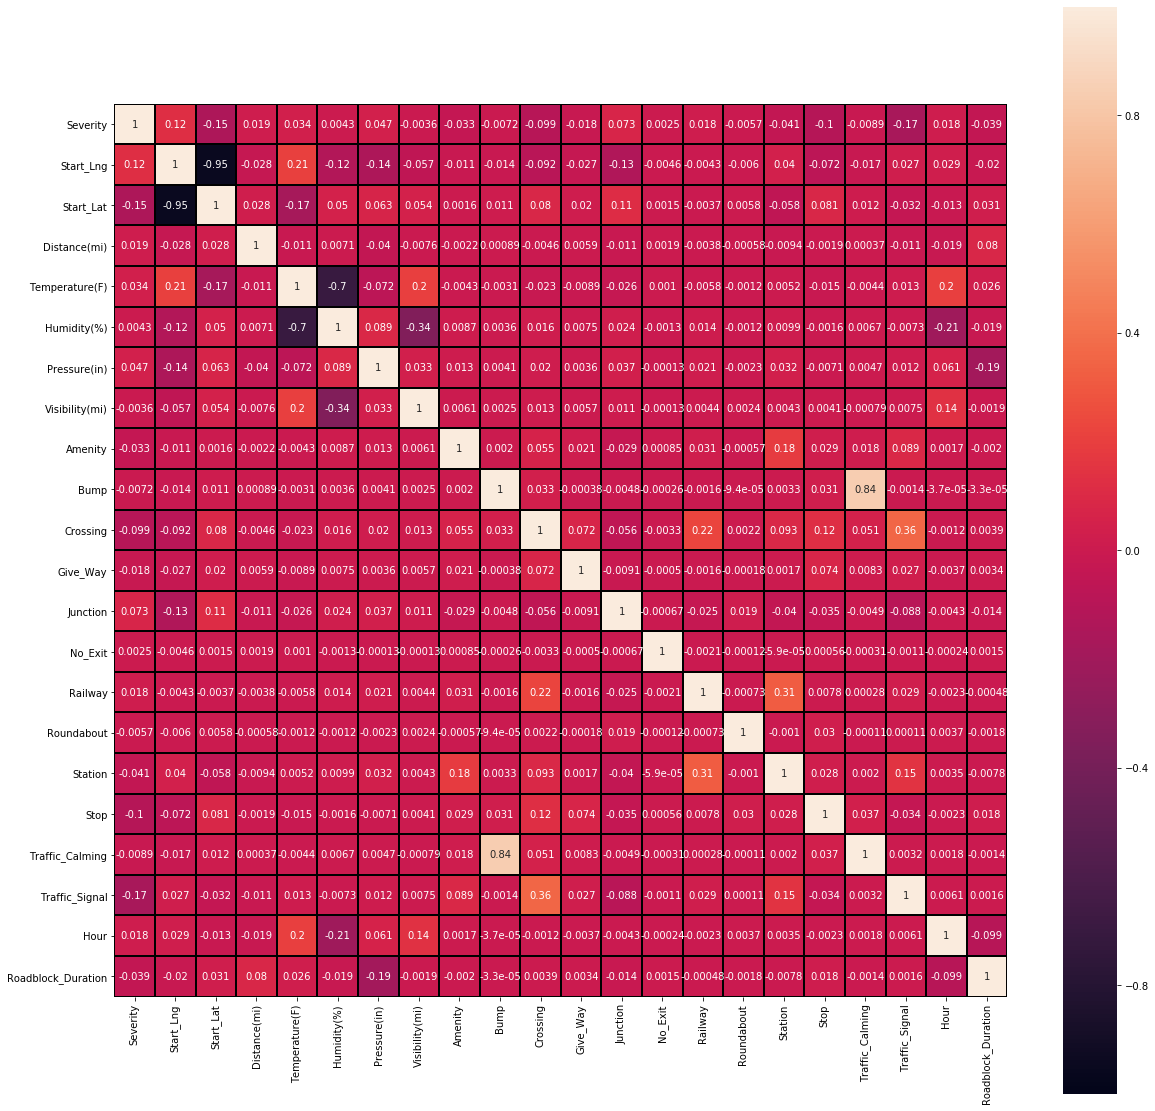

In [43]:
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(df_feature.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

Traffic_Calming and Bump have 0.84 MultiColinearity, so let's remove one of them.

### Dropping Traffic Calming due to Multi-Colinearity

In [44]:
df_feature = df_feature.drop(['Traffic_Calming'],axis='columns')

### Checking Missing values

In [45]:
df_feature.isnull().sum()

Severity              1747
Start_Lng             1747
Start_Lat             1747
Distance(mi)          1747
City                  1749
County                1747
Temperature(F)        6924
Humidity(%)           7453
Pressure(in)          5794
Visibility(mi)        6862
Wind_Direction        6130
Weather_Condition     6364
Amenity               1747
Bump                  1747
Crossing              1747
Give_Way              1747
Junction              1747
No_Exit               1747
Railway               1747
Roundabout            1747
Station               1747
Stop                  1747
Traffic_Signal        1747
Sunrise_Sunset        1749
Day                   7429
Hour                  1747
Weekday               1747
Roadblock_Duration       0
dtype: int64

There are less records with nulls, so lets drop them.

### Dropping the null values.

In [46]:
df_feature.dropna(inplace=True)

In [47]:
df_feature.shape

(238813, 28)

### Checking again for null values.

In [48]:
df_feature.isnull().sum()

Severity              0
Start_Lng             0
Start_Lat             0
Distance(mi)          0
City                  0
County                0
Temperature(F)        0
Humidity(%)           0
Pressure(in)          0
Visibility(mi)        0
Wind_Direction        0
Weather_Condition     0
Amenity               0
Bump                  0
Crossing              0
Give_Way              0
Junction              0
No_Exit               0
Railway               0
Roundabout            0
Station               0
Stop                  0
Traffic_Signal        0
Sunrise_Sunset        0
Day                   0
Hour                  0
Weekday               0
Roadblock_Duration    0
dtype: int64

In [49]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238813 entries, 0 to 254986
Data columns (total 28 columns):
Severity              238813 non-null float64
Start_Lng             238813 non-null float64
Start_Lat             238813 non-null float64
Distance(mi)          238813 non-null float64
City                  238813 non-null object
County                238813 non-null object
Temperature(F)        238813 non-null float64
Humidity(%)           238813 non-null float64
Pressure(in)          238813 non-null float64
Visibility(mi)        238813 non-null float64
Wind_Direction        238813 non-null object
Weather_Condition     238813 non-null object
Amenity               238813 non-null float64
Bump                  238813 non-null float64
Crossing              238813 non-null float64
Give_Way              238813 non-null float64
Junction              238813 non-null float64
No_Exit               238813 non-null float64
Railway               238813 non-null float64
Roundabout         

Now we are left with 238813 rows of data. Lets see the accident locations in map.

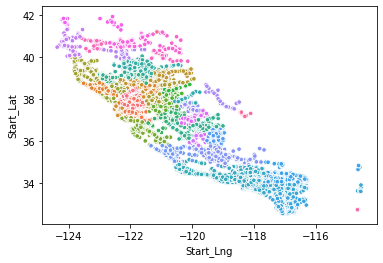

In [50]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_feature, hue='County', legend=False, s=20)
plt.show()

Almost entire region is covered with accident incidents. Lets check most accident prone counties.

### Checking the top 5 accident prone counties in California.

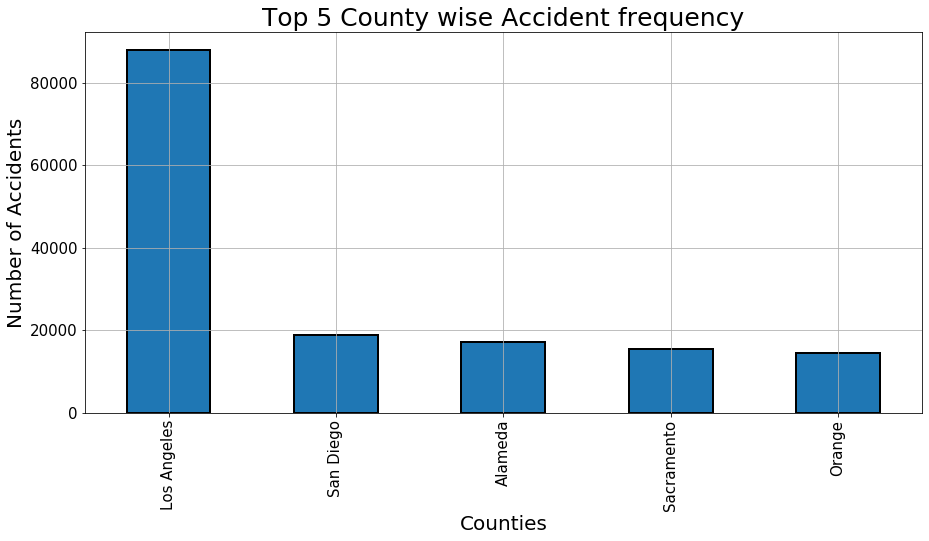

In [51]:
figure = plt.subplots(figsize=(15,7))
df['County'].value_counts(ascending=False).head(5).plot.bar(edgecolor='k',linewidth=2)
plt.title('Top 5 County wise Accident frequency',fontsize=25)
plt.xlabel('Counties',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()

Los Angeles has the highest number of accidents. Let's select Los Angeles and deep dive to analyse what features influence the accident severity in Los Angeles using classification algorithms.

### Selecting the data for County Los Angeles.

In [52]:
county='Los Angeles'
df_county=df_feature.loc[df_feature.County==county].copy()
df_county.drop('County',axis=1, inplace=True)

Selected all the rows for Los Angeles County and dropped County column as its redundant now.

### Accident map color coded by city

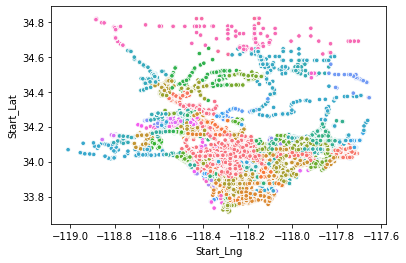

In [53]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=False, s=20)
plt.show()

These are the accident locations under Los Angeles county.

### Checking data of df_county

In [54]:
df_county.head()

,Severity,Start_Lng,Start_Lat,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Sunrise_Sunset,Day,Hour,Weekday,Roadblock_Duration
42136,3.0,-118.496750,34.321411,0.0,Sylmar,80.6,42.0,30.02,10.0,SE,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,40.0
42137,2.0,-118.370384,34.146858,0.0,North Hollywood,84.0,38.0,29.93,10.0,SE,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,38.0
42138,2.0,-118.289040,34.078926,0.0,Los Angeles,82.9,47.0,29.95,10.0,Variable,Clear,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,41.0
42139,3.0,-118.239471,34.091179,0.0,Los Angeles,82.9,47.0,29.95,10.0,Variable,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,45.0
42141,2.0,-118.064323,34.041412,0.0,South El Monte,82.4,42.0,29.99,10.0,SSW,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Day,Morning,10.0,Tue,45.0


Let's check the content of the features before using ML algorithms on it.

### Checking all the weather related features

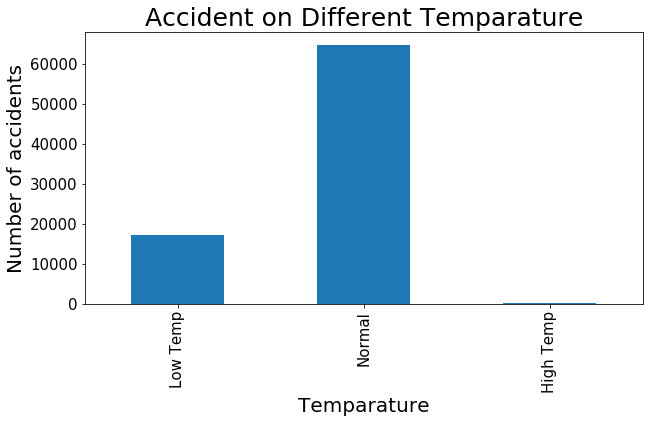

In [55]:
df['Temperature'] = pd.cut((df_county['Temperature(F)']),bins=(0,60,100,120), labels=["Low Temp", "Normal", "High Temp"])
plt.figure(figsize =(10,5))
df.groupby(['Temperature']).size().plot.bar()
plt.title('Accident on Different Temparature',fontsize=25)
plt.xlabel('Temparature',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.tick_params(labelsize=15);

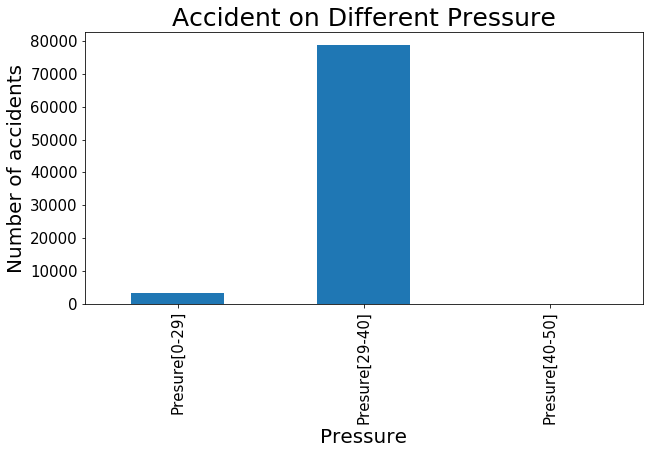

In [56]:
df['Pressure'] = pd.cut((df_county['Pressure(in)']),bins=(0,29,40,50), labels=["Presure[0-29]", "Presure[29-40]", "Presure[40-50]"])
plt.figure(figsize =(10,5))
df.groupby(['Pressure']).size().plot.bar()
plt.title('Accident on Different Pressure',fontsize=25)
plt.xlabel('Pressure',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
plt.tick_params(labelsize=15);

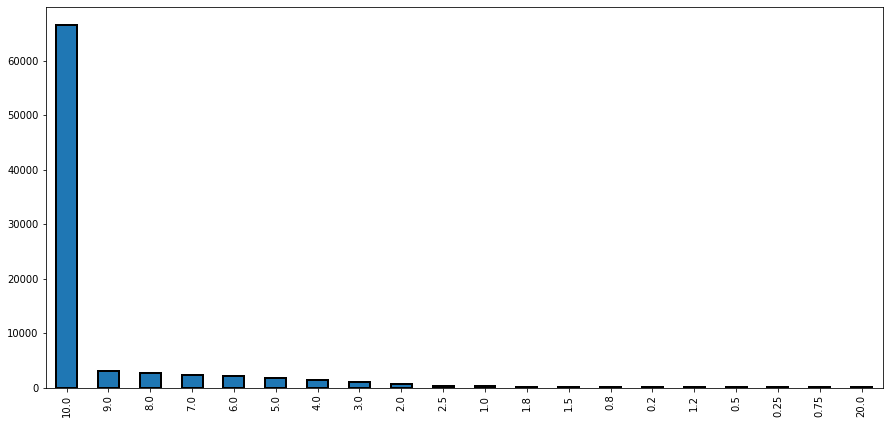

In [57]:
figure = plt.subplots(figsize=(15,7))
df_county['Visibility(mi)'].value_counts(ascending=False).head(20).plot.bar(edgecolor='k',linewidth=2)
plt.show()

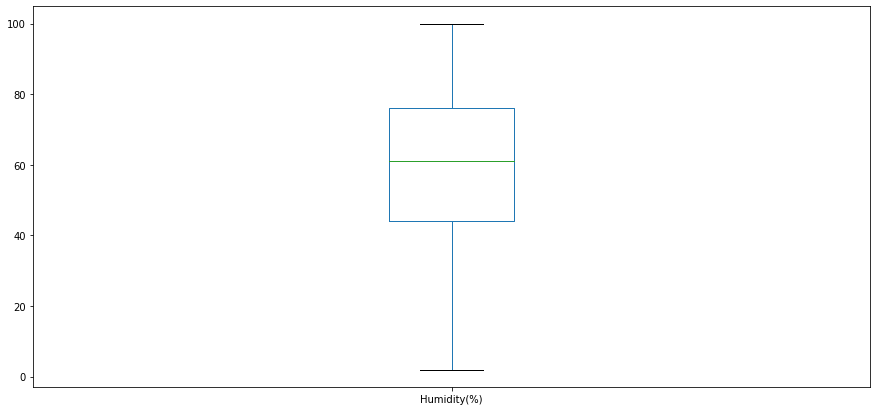

In [58]:
figure = plt.subplots(figsize=(15,7))
df_county['Humidity(%)'].plot.box()
plt.show()

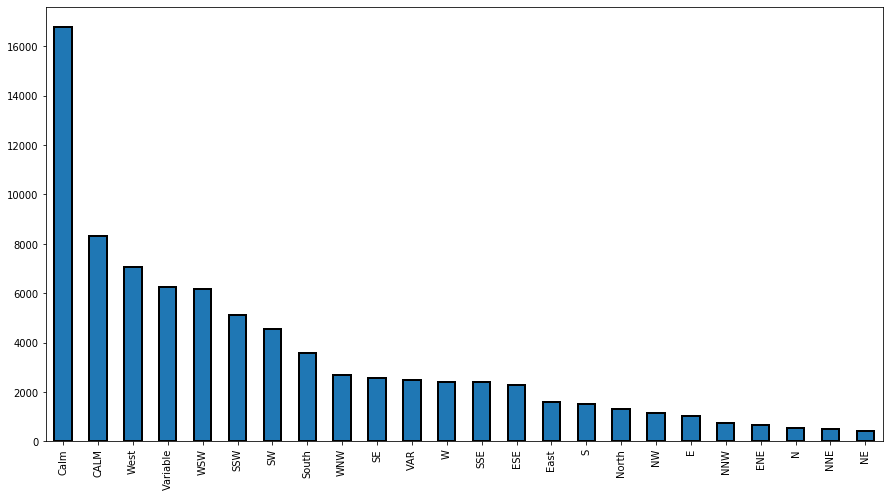

In [59]:
figure = plt.subplots(figsize=(15,8))
df_county['Wind_Direction'].value_counts(ascending=False).plot.bar(edgecolor='k',linewidth=2)
plt.show()

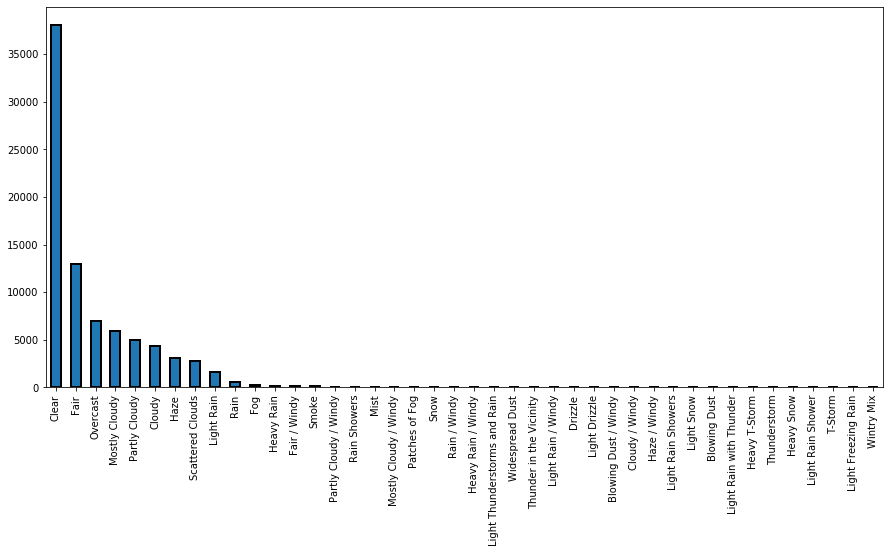

In [60]:
figure = plt.subplots(figsize=(15,7))
df_county['Weather_Condition'].value_counts(ascending=False).plot.bar(edgecolor='k',linewidth=2)
plt.show()

### Checking all the traffic related features.

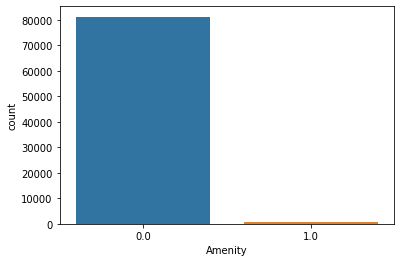

In [61]:
sns.countplot(x='Amenity',data=df_county)

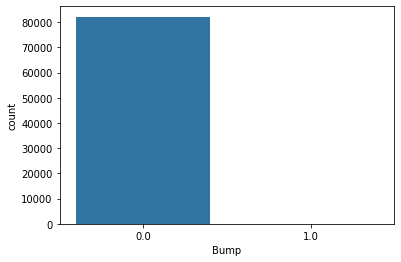

In [62]:
sns.countplot(x='Bump',data=df_county)

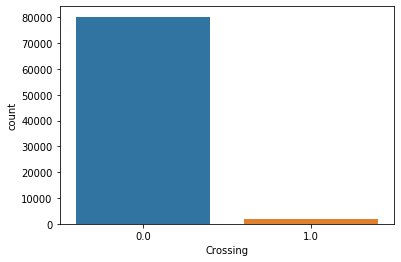

In [63]:
sns.countplot(x='Crossing',data=df_county)

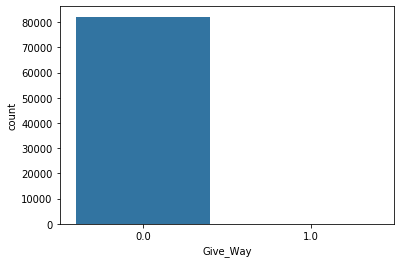

In [64]:
sns.countplot(x='Give_Way',data=df_county)

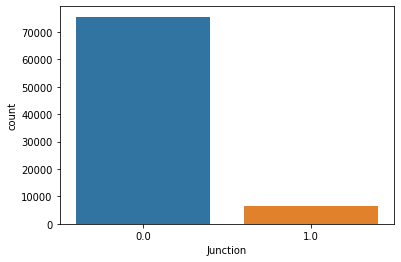

In [65]:
sns.countplot(x='Junction',data=df_county)

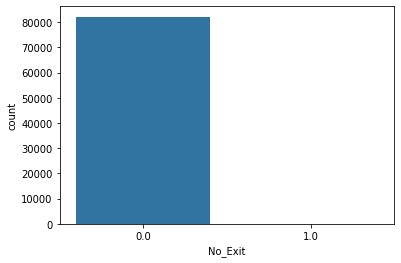

In [67]:
sns.countplot(x='No_Exit',data=df_county)

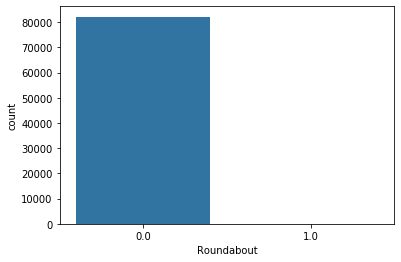

In [68]:
sns.countplot(x='Roundabout',data=df_county)

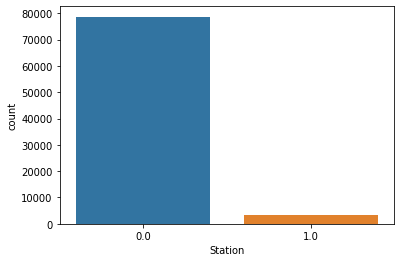

In [69]:
sns.countplot(x='Station',data=df_county)

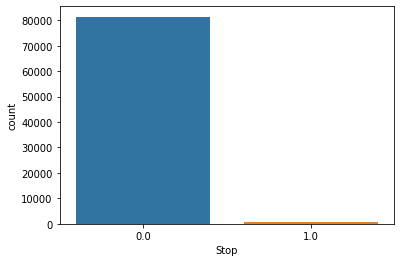

In [70]:
sns.countplot(x='Stop',data=df_county)

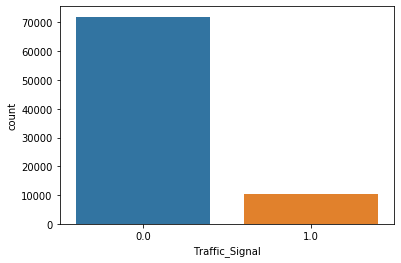

In [71]:
sns.countplot(x='Traffic_Signal',data=df_county)

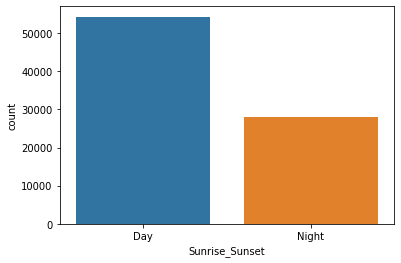

In [72]:
sns.countplot(x='Sunrise_Sunset',data=df_county)

Since we have a lot of categorical data columns, we need to use dummies for encoding as we cant apply ml algorithms on string values in data.

### Generating dummies for categorical data

In [73]:
df_county_final = pd.get_dummies(df_county,drop_first=True)

In [74]:
df_county_final.head()

,Severity,Start_Lng,Start_Lat,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Hour,Roadblock_Duration,City_Agoura Hills,City_Alhambra,City_Arcadia,City_Arleta,City_Artesia,City_Azusa,City_Baldwin Park,City_Bell,City_Bell Canyon,City_Bell Gardens,City_Bellflower,City_Beverly Hills,City_Burbank,City_Calabasas,City_Canoga Park,City_Canyon Country,City_Carson,City_Castaic,City_Cerritos,City_Chatsworth,City_Chino,City_City Of Industry,City_Claremont,City_Commerce,City_Compton,City_Covina,City_Cudahy,City_Culver City,City_Diamond Bar,City_Downey,City_Duarte,City_East San Gabriel Valley,City_El Monte,City_El Segundo,City_Encino,City_Gardena,City_Glendale,City_Glendora,City_Granada Hills,City_Hacienda Heights,City_Harbor City,City_Hawaiian Gardens,City_Hawthorne,City_Hidden Hills,City_Huntington Park,City_Inglewood,City_Irwindale,City_La Crescenta,City_La Habra,City_La Mirada,City_La Puente,City_La Verne,City_Lake Hughes,City_Lakewood,City_Lancaster,City_Lawndale,City_Lebec,City_Leona Valley,City_Littlerock,City_Llano,City_Lomita,City_Long Beach,City_Los Angeles,City_Lynwood,City_Malibu,City_Manhattan Beach,City_Marina Del Rey,City_Marina del Rey,City_Maywood,City_Mission Hills,City_Monrovia,City_Montebello,City_Monterey Park,City_Montrose,City_Newhall,City_North Antelope Valley,City_North Hills,City_North Hollywood,City_Northridge,...,City_Tarzana,City_Temple City,City_Thousand Oaks,City_Toluca Lake,City_Topanga,City_Torrance,City_Tujunga,City_Universal City,City_Valencia,City_Valley Village,City_Valyermo,City_Van Nuys,City_Venice,City_Vernon,City_View Park,City_Walnut,City_West Covina,City_West Hills,City_West Hollywood,City_Westlake Village,City_Whittier,City_Wilmington,City_Windsor Hills,City_Winnetka,City_Woodland Hills,City_Wrightwood,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Blowing Dust / Windy,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Snow,Weather_Condition_Heavy T-Storm,Weather_Condition_Light Drizzle,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Showers,Weather_Condition_Scattered Clouds,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_T-Storm,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Sunrise_Sunset_Night,Day_Morning,Day_Afternoon,Day_Evening,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
42136,3.0,-118.496750,34.321411,0.0,80.6,42.0,30.02,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Now we have numerical data and can apply different classification-based machine learning algorithms on it.

### Declaring the Target variable

In [75]:
df_ml=df_county_final
target='Severity'
y = df_ml[target]
X = df_ml.drop(target, axis=1)

We considered Severity as the dependent variable and all others as features. "Y" is the dependant variable and "X" is the independent variable here. Now, let's import the classifiers to use.

## 5- Machine Learning

### Importing the classifiers.

In [76]:
# Importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Importing KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Importing Support Vector Machine
from sklearn.svm import SVC

#Importing other libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Splitting Data for Training and Testing

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

Selecting 80% data in Training  dataset and 20% in test dataset.

### Logistic Regression

In [78]:
# Logistic regression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
y_prediction=lr_model.predict(X_test)

# Getting accuracy score
Logistic_Regression_Accuracy=accuracy_score(y_test, y_prediction)
 
print("Logistic Regression Algorithm Accuracy_Score: {:.3f}.".format(Logistic_Regression_Accuracy))

/home/sidheswar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sidheswar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Algorithm Accuracy_Score: 0.764.


We used the Scikit-Learn modeling syntax: we first created the model through the "LogisticRegression" function, then we trained the model using the "fit" function, and then we made predictions on the testing data using "predict" function. Then we checked the accuracy score of our model through the "accuracy_score" function from Scikit-Learn metrics.

In Logistic regression, input values are combined linearly using weights or coefficients values to classify the target variable.
* **Reason to use Logistic Regression**
It is mostly used to solve the linear classification problem or in the case where data feature values are not overlapping as this algorithm tries to classify the different groups by dividing them between a straight line. If the data is overlapping, the accuracy score decreases and the error percentage increase as the algorithm fails to create a straight line boundary between the target variable groups.

### Classification Report of Logistic Regression algorithm applied

In [79]:
classification_report(y_test, y_prediction)

/home/sidheswar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n         1.0       0.00      0.00      0.00         6\n         2.0       0.80      0.69      0.74      8043\n         3.0       0.74      0.84      0.78      8369\n         4.0       0.33      0.06      0.10        18\n\n    accuracy                           0.76     16436\n   macro avg       0.47      0.40      0.41     16436\nweighted avg       0.77      0.76      0.76     16436\n'

### Confusion Matrix of Logistic Regression algorithm applied.

In [80]:
confusion_matrix(y_test,y_prediction)

array([[   0,    3,    3,    0],
       [   0, 5569, 2473,    1],
       [   0, 1376, 6992,    1],
       [   0,    2,   15,    1]])

Since we got **76.4** accuracy score using Logistic regression, lets see how Decision Tree classifier algorithm performs as it is good in handling non-linear classification problems. 

### Decision tree classifier algorithm

In [81]:
# Setting 'entropy' as the information criterion
dt_entropy_model = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fitting dt_entropy_model to the training datasets
dt_entropy_model.fit(X_train, y_train)

# Using dt_entropy_model to predict 
y_prediction= dt_entropy_model.predict(X_test)

# Evaluating Entropy Accuracy
Entropy_Accuracy = accuracy_score(y_test, y_prediction)

# Printing Entropy Accuracy
print('Decision Tree -- Entropy accuracy_score: {:.3f}.'.format(Entropy_Accuracy))



# Setting 'gini' as the information criterion
dt_gini_model = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fitting dt_gini_model to the training datasets
dt_gini_model.fit(X_train, y_train)

# Using dt_gini_model to predict 
y_pred= dt_gini_model.predict(X_test)

# Evaluating Gini Accuracy
Gini_Accuracy = accuracy_score(y_test, y_prediction)

# Printing Gini Accuracy
print('Decision Tree -- Gini accuracy_score: {:.3f}.'.format(Gini_Accuracy))

Decision_Tree_Accuracy = Gini_Accuracy

#Classification Report of Decision Tree
classification_report(y_test, y_prediction)

Decision Tree -- Entropy accuracy_score: 0.738.
Decision Tree -- Gini accuracy_score: 0.738.


'              precision    recall  f1-score   support\n\n         1.0       0.00      0.00      0.00         6\n         2.0       0.88      0.54      0.67      8043\n         3.0       0.68      0.93      0.78      8369\n         4.0       0.00      0.00      0.00        18\n\n    accuracy                           0.74     16436\n   macro avg       0.39      0.37      0.36     16436\nweighted avg       0.78      0.74      0.73     16436\n'

Decision Tree algorithm predicts the best choice mathematically starting through a single node that branches into possible outcomes. Each of those outcomes leads to additional nodes, which branch off into other possibilities and this process gives it tree-like shape.

* **Reason to use Decision Tree classifier-** It performs well in non-linear classification problems as it mathematically evaluates the best outcome in each node and good to understand non-linearity in the data. 

We used Entropy(i.e degree of randomness) and Gini(i.e Impurity in the data) as criteria in Decision tree classifier with a maximum depth of 8 from root to leaf node and achieved **73.8** accuracy score which is almost near to **76.4** achieved through Logistic regression. Let's use the Random Forest classifier as it is an ensemble-based algorithm using multiple decision trees, to see whether we achieve more accuracy or not.

### Random Forest Classifier algorithm

In [82]:
#Creating a Gaussian Classifier model
rf_model=RandomForestClassifier(n_estimators=100)

#Training the model using the training datasets
rf_model.fit(X_train,y_train)

#Using rf_model to predict
y_pred=rf_model.predict(X_test)

# Getting accuracy score
Random_Forest_Accuracy=accuracy_score(y_test, y_pred)

print("Randon Forest Algorithm accuracy_score: {:.3f}.".format(Random_Forest_Accuracy))

#Classification Report
classification_report(y_test, y_prediction)

Randon Forest Algorithm accuracy_score: 0.883.


'              precision    recall  f1-score   support\n\n         1.0       0.00      0.00      0.00         6\n         2.0       0.88      0.54      0.67      8043\n         3.0       0.68      0.93      0.78      8369\n         4.0       0.00      0.00      0.00        18\n\n    accuracy                           0.74     16436\n   macro avg       0.39      0.37      0.36     16436\nweighted avg       0.78      0.74      0.73     16436\n'

Random Forest classifier uses a lot of decision trees considered an ensemble, where each tree is a little different from the others. It takes the majority vote of the ensemble to get the final result.

* **Reason to use Random Forest classifier-** To try and beat the performance of Logistic Regression and Decision Tree, we used the Random Forest classifier algorithm on the training data to see how that affects performance as it is very good with non-linear classification problem. The Random Forest is a much more powerful model especially when we used 100 trees.

We achieved **88.3** accuracy score which is better than the scores achieved using Logistic Regression and Decision Tree.

### Checking the most important features among all.

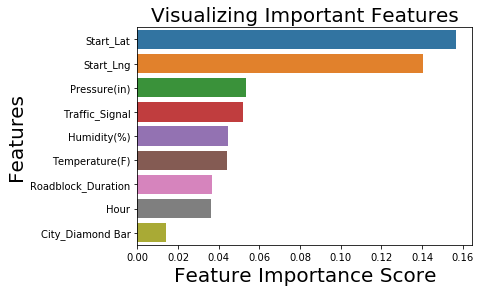

In [83]:
feature_important = pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=9
sns.barplot(x=feature_important[:k], y=feature_important.index[:k])
plt.title("Visualizing Important Features",fontsize=20)
plt.xlabel('Feature Importance Score',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.show()

We looked at the feature importances of the random forest to check the most relevant variables affecting the target variable. Given the correlations we saw in the exploratory data analysis which had less multi-colinearity for the target variable for the above ones, we can see that the most important features are the Location-based variables followed by Traffic signal followed by weather. These feature importances can be used as a method of dimensionality reduction in future work to achieve more accuracy scores and answer the research questions more accurately through data.

### K Nearest Neighbour algorithm

In [84]:
# Creating a k-NN classifier with 6 neighbors
knn_model = KNeighborsClassifier(n_neighbors=6)

# Fitting the classifier with the training data
knn_model.fit(X_train,y_train)

# Predicting
y_pred = knn_model.predict(X_test)

# Getting the accuracy score
KNN_Accuracy=accuracy_score(y_test, y_pred)

print('K-Nearest Neighbors (KNN) knn.score: {:.3f}.'.format(knn_model.score(X_test, y_test)))
print('K-Nearest Neighbors (KNN) accuracy_score: {:.3f}.'.format(KNN_Accuracy))

K-Nearest Neighbors (KNN) knn.score: 0.535.
K-Nearest Neighbors (KNN) accuracy_score: 0.535.


K-Nearest Neighbors (KNN) algorithm works in a very simple way by taking the distance from the known data points. 
* **Reason to use KNN-** It performs well when the data values of features overlap when correlated with respect to the target variable. As we know logistic regression creates a straight line between the target value groups to classify and underperforms when the data is overlapping, KNN is one of the best approaches to work in this type of case. It is also considered as one of the best performers for non-linear classification.

Since we achieved **53.5** accuracy score which is very less compared to the above methods used, let's use one of the Boosting algorithms as they perform well by using multiple algorithms in the background.

### AdaBoostClassifier algorithm

In [85]:
#Creating a AdaBoost classifier model
abc_model = AdaBoostClassifier()
abc_model.fit(X_train,y_train)
y_prediction=abc_model.predict(X_test)

# Getting the accuracy score
AdaBoost_Accuracy=accuracy_score(y_test, y_prediction)

print("Adaptive Boosting Classifier Algorithm Accuracy_Score: {:.3f}.".format(AdaBoost_Accuracy))

Adaptive Boosting Classifier Algorithm Accuracy_Score: 0.508.


Adaboost algorithm combines multiple weak learners into a single strong learner. This method does not follow Bootstrapping, however, it will create different decision trees with a single split (one depth), called decision stumps for each feature.

* **Reason to use AdaBoost-** As we carried out all other types of classifiers, we checked the performance with one of the Boosting types of the classifier which updates the weights of the stumps and makes the decision.

We achieved an accuracy score of 50.8 by using the Adaptive boosting classifier which is very less than the other classifiers we used above.

### Printing all the algorithm's accuracy score.

In [86]:
print("Logistic Regression Algorithm Accuracy_Score: {:.3f}.".format(Logistic_Regression_Accuracy))
print("Adaptive Boosting Classifier Algorithm Accuracy_Score: {:.3f}.".format(AdaBoost_Accuracy))
print('K-Nearest Neighbors (KNN) Accuracy_Score: {:.3f}.'.format(KNN_Accuracy))
print('Decision Tree -- Gini Accuracy_Score: {:.3f}.'.format(Decision_Tree_Accuracy))
print("Randon Forest Algorithm Accuracy_Score: {:.3f}.".format(Random_Forest_Accuracy))

Logistic Regression Algorithm Accuracy_Score: 0.764.
Adaptive Boosting Classifier Algorithm Accuracy_Score: 0.508.
K-Nearest Neighbors (KNN) Accuracy_Score: 0.535.
Decision Tree -- Gini Accuracy_Score: 0.738.
Randon Forest Algorithm Accuracy_Score: 0.883.


## 6- Conclusion

In this notebook, We first imported the data of California road accidents. Then, we performed fairly detailed EDA to identify relationships, trends, and anomalies in the data features. Along the way, we performed necessary preprocessing steps such as null handling, encoding categorical variables, imputing missing values. Then, we constructed new features out of the existing data to further analyse the data and see if doing so could help out explaining the feature importance. We philosophied about the variables, we analysed the data, checked the most correlated variables, we dealt with missing data and outliers, we transformed data according to some of the fundamental statistical norms and we even transformed categorical variables into dummy variables.

Once the data exploration, data preparation, and feature engineering were complete, we implemented different classifiers through creating their baseline model upon which we hope to improve in future scope. First, we used Logistic Regression in which we achieved a 76.4 accuracy score. Then we used the Decision Tree classifier and achieved a 73.8 accuracy score. Furthermore, we used the Random Forest classifier and achieved an 88.3 accuracy score. Then we tried the KNN classifier and achieved a 53.5 accuracy score. Finally, we used Adaptive Boosting and achieved a 50.8 accuracy score. Hence for California road accident data, the Random Forest classifier proved to classify the accident severity with the best performance of 88.3 score which is an ensemble-based classifier taking the majority votes of the ensemble to get the final result. We also saw that the location of the accident impacts the accident severity majorly causing long traffic delays. Hence the Road Transport governing body must consider this and make necessary changes on these spots to decrease accident chances. Then we saw Traffic signal, weather, and accident time also impact the accident severity, which can be improved by imposing more strict road safety violation rules for traffic signals and at busy travel times. 

For future scope, we can fiddle with the algorithm parameters by attempting to understand how our models make decisions and can try to improve them or examine the mistakes to correct the errors and improve the accuracy score furthermore.